In [112]:
## Import Libraries
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from io import StringIO

In [113]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 8]
pd.plotting.register_matplotlib_converters()
plt.style.use('seaborn-dark')

In [114]:
download_link = 'https://www.arcgis.com/sharing/rest/content/items/f10774f1c63e40168479a1feb6c7ca74/data'
# see https://www.arcgis.com/home/item.html?id=dd4580c810204019a7b8eb3e0b329dd6
# new source https://www.arcgis.com/home/item.html?id=f10774f1c63e40168479a1feb6c7ca74

In [115]:
req = requests.get(download_link)
rki_raw = pd.read_csv(StringIO(req.text))

In [116]:
rki_raw.tail(20)

FID  IdBundesland Bundesland            Landkreis Altersgruppe  \
1339092  1339093            16  Thüringen  LK Altenburger Land      A60-A79   
1339093  1339094            16  Thüringen  LK Altenburger Land      A60-A79   
1339094  1339095            16  Thüringen  LK Altenburger Land      A60-A79   
1339095  1339096            16  Thüringen  LK Altenburger Land      A60-A79   
1339096  1339097            16  Thüringen  LK Altenburger Land      A60-A79   
1339097  1339098            16  Thüringen  LK Altenburger Land      A60-A79   
1339098  1339099            16  Thüringen  LK Altenburger Land      A60-A79   
1339099  1339100            16  Thüringen  LK Altenburger Land      A60-A79   
1339100  1339101            16  Thüringen  LK Altenburger Land      A60-A79   
1339101  1339102            16  Thüringen  LK Altenburger Land      A60-A79   
1339102  1339103            16  Thüringen  LK Altenburger Land      A60-A79   
1339103  1339104            16  Thüringen  LK Altenburger Land      A60-A79   
1339104  1339105            16  Thüringen  LK Altenburger Land      A60-A79   
1339105  1339106            16  Thüringen  LK Altenburger Land      A60-A79   
1339106  1339107            16  Thüringen  LK Altenburger Land      A60-A79   
1339107  1339108            16  Thüringen  LK Altenburger Land      A60-A79   
1339108  1339109            16  Thüringen  LK Altenburger Land      A60-A79   
1339109  1339110            16  Thüringen  LK Altenburger Land      A60-A79   
1339110  1339111            16  Thüringen  LK Altenburger Land      A60-A79   
1339111  1339112            16  Thüringen  LK Altenburger Land      A60-A79   

        Geschlecht  AnzahlFall  AnzahlTodesfall           Meldedatum  \
1339092          M           1                0  2021/02/08 00:00:00   
1339093          M           1                1  2021/02/09 00:00:00   
1339094          M           2                0  2021/02/09 00:00:00   
1339095          M           1                1  2021/02/10 00:00:00   
1339096          M           1                0  2021/02/10 00:00:00   
1339097          M           1                0  2021/02/11 00:00:00   
1339098          M           2                0  2021/02/12 00:00:00   
1339099          M           1                1  2021/02/13 00:00:00   
1339100          M           1                0  2021/02/13 00:00:00   
1339101          M           1                0  2021/02/14 00:00:00   
1339102          M           1                0  2021/02/15 00:00:00   
1339103          M           1                0  2021/02/16 00:00:00   
1339104          M           2                0  2021/02/17 00:00:00   
1339105          M           2                0  2021/02/18 00:00:00   
1339106          M           1                0  2021/02/21 00:00:00   
1339107          M           1                0  2021/02/24 00:00:00   
1339108          M           2                0  2021/02/25 00:00:00   
1339109          M           1                0  2021/02/26 00:00:00   
1339110          M           1                0  2021/02/27 00:00:00   
1339111          M           2                0  2021/03/01 00:00:00   

         IdLandkreis             Datenstand  NeuerFall  NeuerTodesfall  \
1339092        16077  04.03.2021, 00:00 Uhr          0              -9   
1339093        16077  04.03.2021, 00:00 Uhr          0               0   
1339094        16077  04.03.2021, 00:00 Uhr          0              -9   
1339095        16077  04.03.2021, 00:00 Uhr          0               0   
1339096        16077  04.03.2021, 00:00 Uhr          0              -9   
1339097        16077  04.03.2021, 00:00 Uhr          0              -9   
1339098        16077  04.03.2021, 00:00 Uhr          0              -9   
1339099        16077  04.03.2021, 00:00 Uhr          0               0   
1339100        16077  04.03.2021, 00:00 Uhr          0              -9   
1339101        16077  04.03.2021, 00:00 Uhr          0              -9   
1339102        16077  04.0

In [117]:
set(rki_raw['Altersgruppe'])

{'A00-A04', 'A05-A14', 'A15-A34', 'A35-A59', 'A60-A79', 'A80+', 'unbekannt'}

In [118]:
rki_raw_60 = rki_raw[~rki_raw.Altersgruppe.isin(['A60-A79', 'A80+'])].copy()

In [162]:
rki_raw_80 = rki_raw[rki_raw.Altersgruppe.isin(['A80+'])].copy()

In [163]:
rki_raw_80_death = rki_raw_80[rki_raw_80.NeuerTodesfall.isin([0, 1])].copy()

In [164]:
rki_raw_80_death.sort_values(by='Meldedatum').tail(20)

FID  IdBundesland              Bundesland  \
288605    288606             5     Nordrhein-Westfalen   
870582    870583             9                  Bayern   
12921      12922             1      Schleswig-Holstein   
533820    533821             6                  Hessen   
1259485  1259486            15          Sachsen-Anhalt   
1232138  1232139            14                 Sachsen   
224181    224182             5     Nordrhein-Westfalen   
1101372  1101373            11                  Berlin   
1313328  1313329            16               Thüringen   
969025    969026             9                  Bayern   
1331182  1331183            16               Thüringen   
1141077  1141078            12             Brandenburg   
1321527  1321528            16               Thüringen   
653132    653133             8       Baden-Württemberg   
362643    362644             5     Nordrhein-Westfalen   
1327863  1327864            16               Thüringen   
539743    539744             7         Rheinland-Pfalz   
631514    631515             8       Baden-Württemberg   
1179715  1179716            13  Mecklenburg-Vorpommern   
244669    244670             5     Nordrhein-Westfalen   

                                   Landkreis Altersgruppe Geschlecht  \
288605                          LK Heinsberg         A80+          W   
870582                   LK Freyung-Grafenau         A80+          M   
12921                       LK Nordfriesland         A80+          W   
533820                LK Werra-Meißner-Kreis         A80+          W   
1259485                             SK Halle         A80+          W   
1232138                            LK Meißen         A80+          W   
224181                           LK Mettmann         A80+          M   
1101372        SK Berlin Marzahn-Hellersdorf         A80+          W   
1313328            LK Schmalkalden-Meiningen         A80+          W   
969025   LK Neustadt a.d.Aisch-Bad Windsheim         A80+          M   
1331182               LK Saalfeld-Rudolstadt         A80+          W   
1141077                         LK Oberhavel         A80+          M   
1321527                    LK Hildburghausen         A80+          M   
653132                         LK Heidenheim         A80+          M   
362643                              LK Lippe         A80+          W   
1327863               LK Saalfeld-Rudolstadt         A80+          M   
539743                       LK Altenkirchen         A80+          M   
631514                        LK Ludwigsburg         A80+          W   
1179715               LK Ludwigslust-Parchim         A80+          M   
244669                               SK Bonn         A80+          W   

         AnzahlFall  AnzahlTodesfall           Meldedatum  IdLandkreis  \
288605            1                1  2021/03/01 00:00:00         5370   
870582            1                1  2021/03/01 00:00:00         9272   
12921             1                1  2021/03/01 00:00:00         1054   
533820            1                1  2021/03/01 00:00:00         6636   
1259485           1                1  2021/03/01 00:00:00        15002   
1232138           1                1  2021/03/01 00:00:00        14627   
224181            1                1  2021/03/01 00:00:00         5158   
1101372           1                1  2021/03/01 00:00:00        11010   
1313328           1                1  2021/03/01 00:00:00        16066   
969025            1                1  2021/03/01 00:00:00         9575   
1331182           1                1  2021/03/01 00:00:00        16073   
1141077           1                1  2021/03/01 00:00:00        12065   
1321527           1                1  2021/03/01 00:00:00        16069   
653132            1                1  2021/03/02 00:00:00         8135   
362643            1                1  2021/03/02 00:00:00         5766   
1327863           1                1  2021/03/02 00:00:00        16073   
539743            1    

In [122]:
def new_cases_by_date(rki_raw, rki_flag_column='Neuer Fall', rki_count_columns='AnzahlFall'):
    """
    rki_raw: raw DataFrame from Robert Koch Institute
    """
    condition = rki_raw[rki_flag_column].isin((0, 1))
    rki_series = rki_raw[condition].groupby('Meldedatum').sum()[rki_count_columns].copy()
    rki_series.index = pd.to_datetime(rki_series.index)
    rki_series.sort_index(inplace=True)
    return rki_series

In [123]:
rki_raw_fb = rki_raw[rki_raw.Landkreis.isin(['SK Flensburg'])].copy()
rki_raw_fb

FID  IdBundesland          Bundesland     Landkreis Altersgruppe  \
0        1             1  Schleswig-Holstein  SK Flensburg      A15-A34   
1        2             1  Schleswig-Holstein  SK Flensburg      A15-A34   
2        3             1  Schleswig-Holstein  SK Flensburg      A15-A34   
3        4             1  Schleswig-Holstein  SK Flensburg      A15-A34   
4        5             1  Schleswig-Holstein  SK Flensburg      A15-A34   
...    ...           ...                 ...           ...          ...   
2495  2496             1  Schleswig-Holstein  SK Flensburg      A15-A34   
2496  2497             1  Schleswig-Holstein  SK Flensburg      A15-A34   
2497  2498             1  Schleswig-Holstein  SK Flensburg      A15-A34   
2498  2499             1  Schleswig-Holstein  SK Flensburg      A15-A34   
2499  2500             1  Schleswig-Holstein  SK Flensburg      A15-A34   

     Geschlecht  AnzahlFall  AnzahlTodesfall           Meldedatum  \
0             W           2                0  2021/01/15 00:00:00   
1             W           1                0  2021/01/16 00:00:00   
2             W           1                0  2021/01/16 00:00:00   
3             W           2                0  2021/01/16 00:00:00   
4             W           1                0  2021/01/17 00:00:00   
...         ...         ...              ...                  ...   
2495          W           1                0  2021/01/13 00:00:00   
2496          W           1                0  2021/01/13 00:00:00   
2497          W           1                0  2021/01/14 00:00:00   
2498          W           1                0  2021/01/14 00:00:00   
2499          W           1                0  2021/01/15 00:00:00   

      IdLandkreis             Datenstand  NeuerFall  NeuerTodesfall  \
0            1001  04.03.2021, 00:00 Uhr          0              -9   
1            1001  04.03.2021, 00:00 Uhr          0              -9   
2            1001  04.03.2021, 00:00 Uhr          0              -9   
3            1001  04.03.2021, 00:00 Uhr          0              -9   
4            1001  04.03.2021, 00:00 Uhr          0              -9   
...           ...                    ...        ...             ...   
2495         1001  04.03.2021, 00:00 Uhr          0              -9   
2496         1001  04.03.2021, 00:00 Uhr          0              -9   
2497         1001  04.03.2021, 00:00 Uhr          0              -9   
2498         1001  04.03.2021, 00:00 Uhr          0              -9   
2499         1001  04.03.2021, 00:00 Uhr          0              -9   

                 Refdatum  NeuGenesen  AnzahlGenesen  IstErkrankungsbeginn  \
0     2021/01/15 00:00:00           0              2                     0   
1     2021/01/10 00:00:00           0              1                     1   
2     2021/01/14 00:00:00           0              1                     1   
3     2021/01/16 00:00:00           0              2                     0   
4     2021/01/11 00:00:00           0              1                     1   
...                   ...         ...            ...                   ...   
2495  2021/01/08 00:00:00           0              1                     1   
2496  2021/01/13 00:00:00           0              1                     0   
2497  2021/01/08 00:00:00           0              1                     1   
2498  2021/01/14 00:00:00           0              1                     0   
2499  2021/01/13 00:00:00           0              1                     1   

          Altersgruppe2  
0     Nicht übermittelt  
1     Nicht übermittelt  
2     Nicht übermittelt  
3     Nicht übermittelt  
4     Nicht übermittelt  
...                 ...  
2495  Nicht übermittelt  
2496  Nicht übermittelt  
2497  Nicht übermittelt  
2498  Nicht übermittelt  
2499  Nicht übermittelt  

[1241 rows x 18 columns]

In [124]:
rki_raw_kln = rki_raw[rki_raw.Landkreis.isin(['SK Köln'])].copy()
rki_raw_kln

FID  IdBundesland           Bundesland Landkreis Altersgruppe  \
242500  242501             5  Nordrhein-Westfalen   SK Köln      A00-A04   
242501  242502             5  Nordrhein-Westfalen   SK Köln      A00-A04   
242502  242503             5  Nordrhein-Westfalen   SK Köln      A00-A04   
242503  242504             5  Nordrhein-Westfalen   SK Köln      A00-A04   
242504  242505             5  Nordrhein-Westfalen   SK Köln      A00-A04   
...        ...           ...                  ...       ...          ...   
254515  254516             5  Nordrhein-Westfalen   SK Köln         A80+   
254516  254517             5  Nordrhein-Westfalen   SK Köln         A80+   
254517  254518             5  Nordrhein-Westfalen   SK Köln         A80+   
254518  254519             5  Nordrhein-Westfalen   SK Köln         A80+   
254519  254520             5  Nordrhein-Westfalen   SK Köln         A80+   

       Geschlecht  AnzahlFall  AnzahlTodesfall           Meldedatum  \
242500          W           1                0  2020/11/26 00:00:00   
242501          W           2                0  2020/11/26 00:00:00   
242502          W           1                0  2020/11/26 00:00:00   
242503          W           1                0  2020/11/27 00:00:00   
242504          W           1                0  2020/11/27 00:00:00   
...           ...         ...              ...                  ...   
254515          M           1                1  2021/01/29 00:00:00   
254516          M           6                0  2021/01/29 00:00:00   
254517          M           7                0  2021/01/30 00:00:00   
254518          M           2                0  2021/01/31 00:00:00   
254519          M           1                1  2021/01/31 00:00:00   

        IdLandkreis             Datenstand  NeuerFall  NeuerTodesfall  \
242500         5315  04.03.2021, 00:00 Uhr          0              -9   
242501         5315  04.03.2021, 00:00 Uhr          0              -9   
242502         5315  04.03.2021, 00:00 Uhr          0              -9   
242503         5315  04.03.2021, 00:00 Uhr          0              -9   
242504         5315  04.03.2021, 00:00 Uhr          0              -9   
...             ...                    ...        ...             ...   
254515         5315  04.03.2021, 00:00 Uhr          0               0   
254516         5315  04.03.2021, 00:00 Uhr          0              -9   
254517         5315  04.03.2021, 00:00 Uhr          0              -9   
254518         5315  04.03.2021, 00:00 Uhr          0              -9   
254519         5315  04.03.2021, 00:00 Uhr          0               0   

                   Refdatum  NeuGenesen  AnzahlGenesen  IstErkrankungsbeginn  \
242500  2020/11/23 00:00:00           0              1                     1   
242501  2020/11/24 00:00:00           0              2                     1   
242502  2020/11/26 00:00:00           0              1                     0   
242503  2020/11/25 00:00:00           0              1                     1   
242504  2020/11/27 00:00:00           0              1                     0   
...                     ...         ...            ...                   ...   
254515  2021/01/29 00:00:00          -9              0                     0   
254516  2021/01/29 00:00:00           0              6                     0   
254517  2021/01/30 00:00:00           0              7                     0   
254518  2021/01/31 00:00:00           0              2                     0   
254519  2021/01/31 00:00:00          -9              0                     0   

            Altersgruppe2  
242500  Nicht übermittelt  
242501  Nicht übermittelt  
242502  Nicht übermittelt  
242503  Nicht übermittelt  
242504  Nicht übermittelt  
...                   ...  
254515  Nicht übermittelt  
254516  Nicht übermittelt  
254517  Nicht übermittelt  
254518  Nicht übermittelt  
254519  Nicht übermittelt  

[10957 rows x 18 columns]

In [125]:
rki_fb_cases = new_cases_by_date(rki_raw_fb, rki_flag_column='NeuerFall', rki_count_columns='AnzahlFall')
rki_kln_cases = new_cases_by_date(rki_raw_kln, rki_flag_column='NeuerFall', rki_count_columns='AnzahlFall')


In [126]:
rki_kln_incidence = rki_kln_cases.rolling(7).sum() / 1017000 * 100000

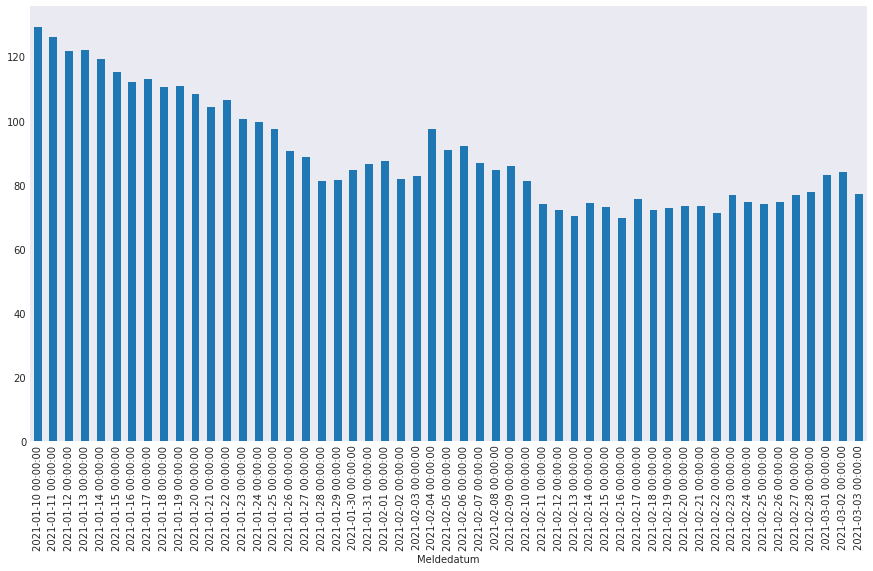

In [127]:
rki_kln_incidence['01-10-2021':].plot.bar()

In [128]:
rki_kln_incidence.tail()

Meldedatum
2021-02-27    76.892822
2021-02-28    77.876106
2021-03-01    82.890855
2021-03-02    83.874140
2021-03-03    76.991150
Name: AnzahlFall, dtype: float64

In [129]:
rki_cases = new_cases_by_date(rki_raw, rki_flag_column='NeuerFall', rki_count_columns='AnzahlFall')
rki_death = new_cases_by_date(rki_raw, rki_flag_column='NeuerTodesfall', rki_count_columns='AnzahlTodesfall')
rki_recovered = new_cases_by_date(rki_raw, rki_flag_column='NeuGenesen', rki_count_columns='AnzahlGenesen')

In [165]:
rki_cases2 = new_cases_by_date(rki_raw_80, rki_flag_column='NeuerFall', rki_count_columns='AnzahlFall')
rki_death2 = new_cases_by_date(rki_raw_80, rki_flag_column='NeuerTodesfall', rki_count_columns='AnzahlTodesfall')
rki_recovered2 = new_cases_by_date(rki_raw_80, rki_flag_column='NeuGenesen', rki_count_columns='AnzahlGenesen')

In [131]:
rki_cases3 = new_cases_by_date(rki_raw_old, rki_flag_column='NeuerFall', rki_count_columns='AnzahlFall')
rki_death3 = new_cases_by_date(rki_raw_old, rki_flag_column='NeuerTodesfall', rki_count_columns='AnzahlTodesfall')
rki_recovered3 = new_cases_by_date(rki_raw_old, rki_flag_column='NeuGenesen', rki_count_columns='AnzahlGenesen')

In [132]:
rki = pd.concat([rki_cases, rki_death, rki_recovered], axis=1, sort=True)
columns_dict = {'AnzahlFall': 'NewCases', 'AnzahlTodesfall': 'NewDeathRKI', 'AnzahlGenesen': 'NewRecoveredRKI'}
rki.rename(columns_dict, axis=1, inplace=True)
# using estimates for recovery dates and death dates
shift_recovery = 14 # days
shift_death = 20 # days
rki['NewRecovered'] = rki.NewRecoveredRKI.shift(shift_recovery).fillna(0)
rki['NewDeath'] = rki.NewDeathRKI.shift(shift_death).fillna(0)
s = rki['NewRecoveredRKI'].copy()
s.values[:-shift_recovery] = 0.
rki['NewRecovered'] += s
s = rki['NewDeathRKI'].copy()
s.values[:-shift_death] = 0.
rki['NewDeath'] += s
rki.fillna(value=0., inplace=True)
rki.tail()

NewCases  NewDeathRKI  NewRecoveredRKI  NewRecovered  NewDeath
Meldedatum                                                                
2021-02-27      7659         12.0              187        4029.0      89.0
2021-02-28      3461          8.0               69        2557.0     190.0
2021-03-01      4575         17.0               62        2858.0     230.0
2021-03-02     10653         12.0               88        6391.0     241.0
2021-03-03      8054          2.0               33        6845.0     223.0

In [166]:
rki80 = pd.concat([rki_cases2, rki_death2, rki_recovered2], axis=1, sort=True)
columns_dict = {'AnzahlFall': 'NewCases', 'AnzahlTodesfall': 'NewDeathRKI', 'AnzahlGenesen': 'NewRecoveredRKI'}
rki80.rename(columns_dict, axis=1, inplace=True)
rki80['Case Fatality'] = rki80.NewDeathRKI / rki80.NewCases * 100
rki80.replace(np.nan, 0, inplace=True)
rki80.tail()

NewCases  NewDeathRKI  NewRecoveredRKI  Case Fatality
Meldedatum                                                       
2021-02-27       446          8.0                7       1.793722
2021-02-28       204          6.0                5       2.941176
2021-03-01       373         14.0                1       3.753351
2021-03-02       563          5.0                7       0.888099
2021-03-03       402          2.0                1       0.497512

In [134]:
rki_old = pd.concat([rki_cases3, rki_death3, rki_recovered3], axis=1, sort=True)
columns_dict = {'AnzahlFall': 'NewCases', 'AnzahlTodesfall': 'NewDeathRKI', 'AnzahlGenesen': 'NewRecoveredRKI'}
rki_old.rename(columns_dict, axis=1, inplace=True)
rki_old['Case Fatality'] = rki_old.NewDeathRKI / rki_old.NewCases * 100
rki_old.replace(np.nan, 0, inplace=True)
rki_old.tail()

NewCases  NewDeathRKI  NewRecoveredRKI  Case Fatality
Meldedatum                                                       
2021-02-27      1606         12.0               44       0.747198
2021-02-28       692          7.0               19       1.011561
2021-03-01      1069         17.0               11       1.590271
2021-03-02      2137         11.0               20       0.514740
2021-03-03      1578          2.0                6       0.126743

Text(0.5, 1.0, 'Case Fatality Germany for cases aged 80 or above (%)')

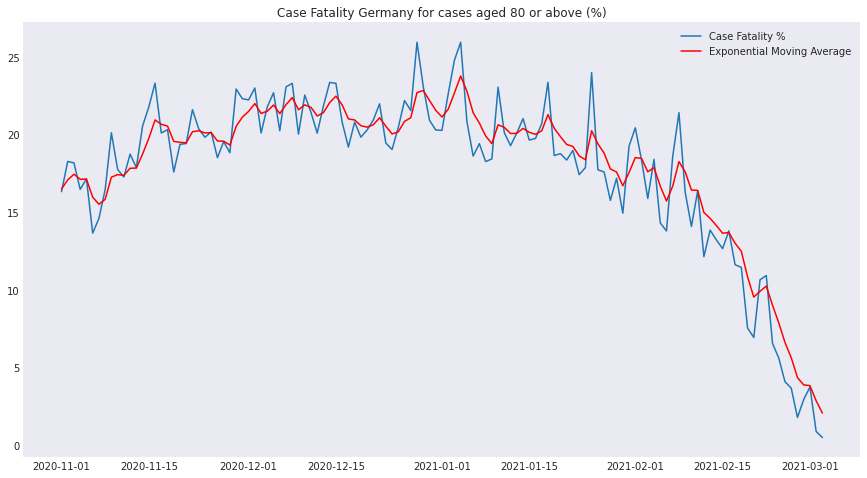

In [171]:
#rki60er['Case Fatality']['10-01-2020':].plot.bar()
start_date = '11-01-2020'
x = rki80[start_date:].index
plt.plot(x, rki80['Case Fatality'][start_date:], label='Case Fatality %')
plt.plot(x, rki80['Case Fatality'].ewm(span=5,adjust=False).mean()[start_date:], label='Exponential Moving Average', color='red')
plt.legend(loc='best')
plt.title('Case Fatality Germany for cases aged 80 or above (%)')

Text(0.5, 1.0, 'Fatalities by date of PCR positive test for ages 80+ Germany')

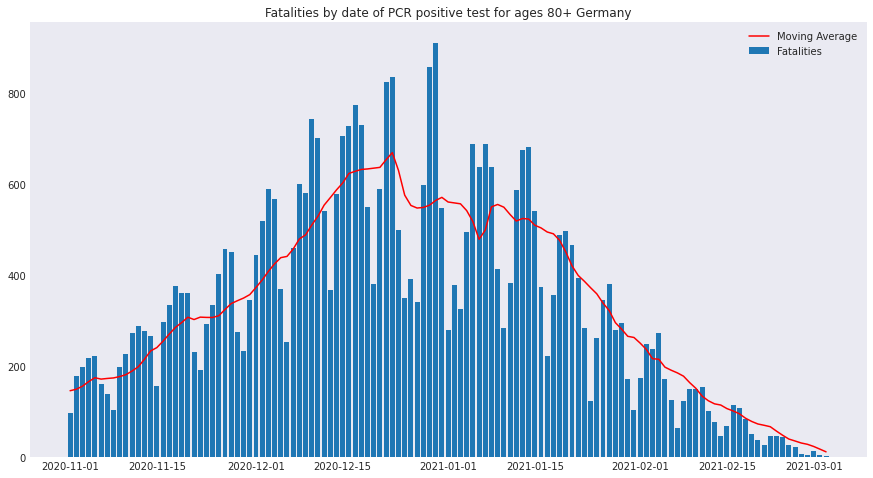

In [184]:
start_date = '11-01-2020'
x = rki80[start_date:].index
plt.bar(x, rki80.NewDeathRKI[start_date:], label='Fatalities')
plt.plot(x, rki80.NewDeathRKI.rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Fatalities by date of PCR positive test for ages 80+ Germany')

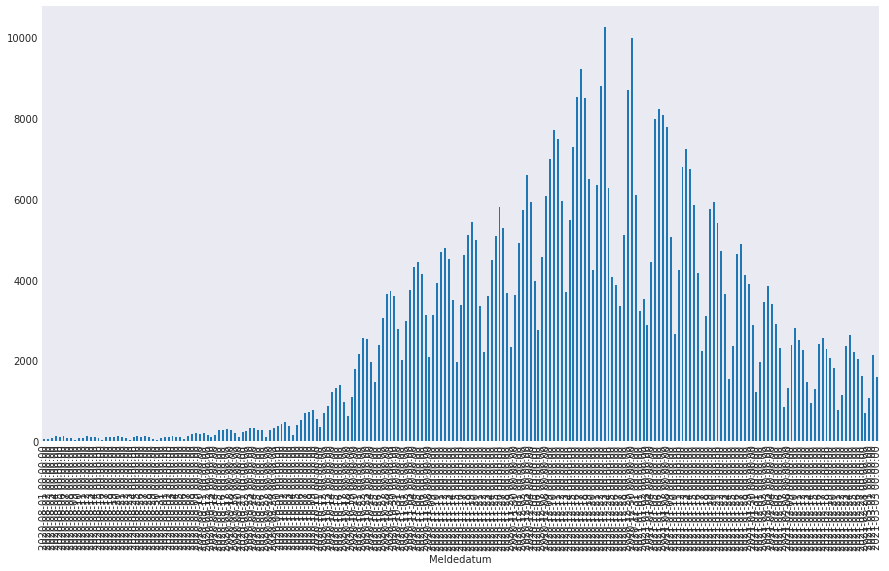

In [136]:
rki_old['NewCases']['08-01-2020':].plot.bar()

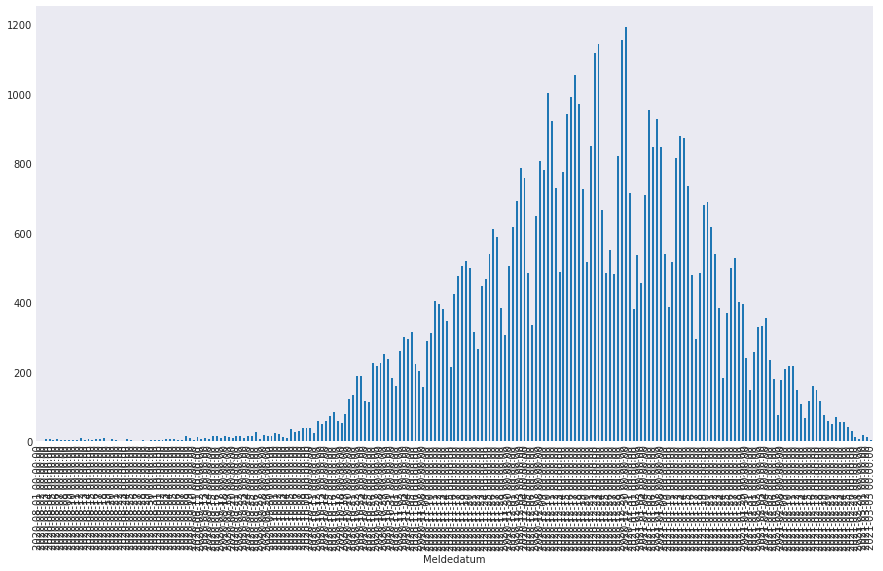

In [137]:
rki_old['NewDeathRKI']['08-01-2020':].plot.bar()

In [138]:
rki_old['Case Fatality'].tail(25)

Meldedatum
2021-02-07     9.112710
2021-02-08    13.368580
2021-02-09     8.693826
2021-02-10     7.774991
2021-02-11     8.603441
2021-02-12     6.530431
2021-02-13     7.328767
2021-02-14     7.006369
2021-02-15     9.013209
2021-02-16     6.680585
2021-02-17     5.801646
2021-02-18     5.107882
2021-02-19     3.705510
2021-02-20     3.186813
2021-02-21     6.501951
2021-02-22     6.200873
2021-02-23     2.335456
2021-02-24     2.139855
2021-02-25     1.804240
2021-02-26     1.368524
2021-02-27     0.747198
2021-02-28     1.011561
2021-03-01     1.590271
2021-03-02     0.514740
2021-03-03     0.126743
Name: Case Fatality, dtype: float64

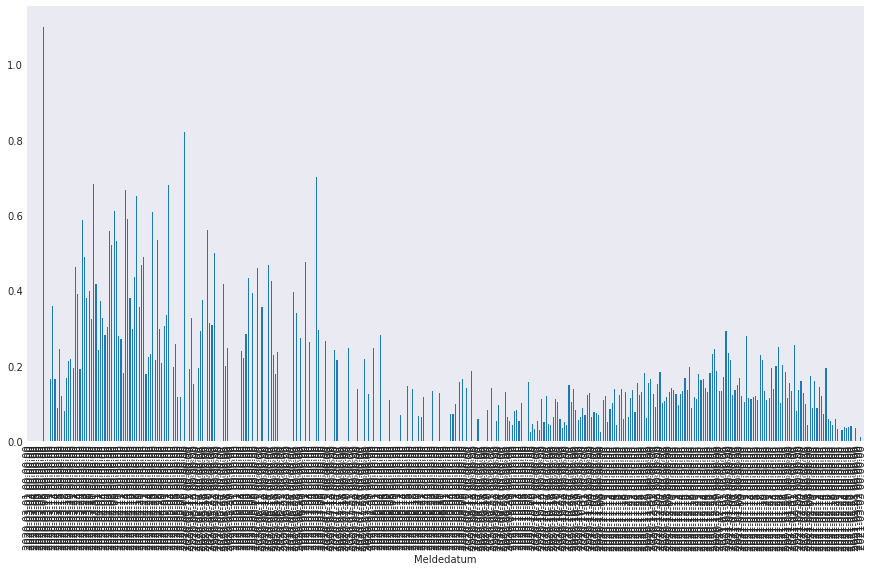

In [139]:
rki60['Case Fatality']['03-01-2020':].plot.bar()

In [140]:
rki60['NewDeathRKI'].sum()

2413.0

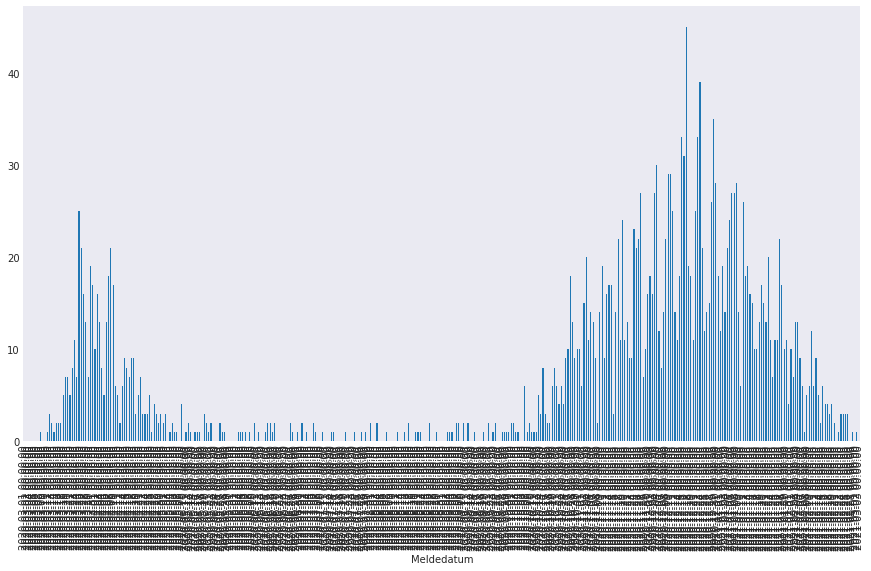

In [141]:
rki60['NewDeathRKI']['03-01-2020':].plot.bar()

Text(0.5, 1.0, 'Case Fatality Germany for cases aged 60 or below (%)')

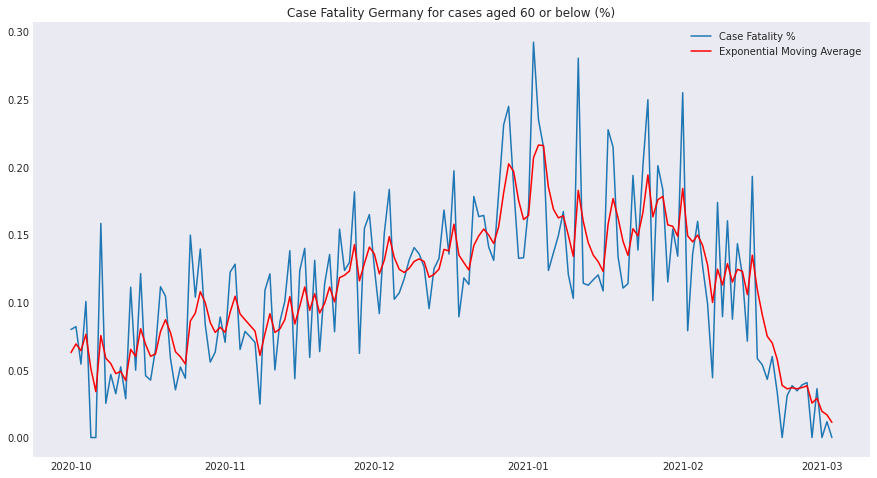

In [142]:
start_date = '10-01-2020'
rki60['Case Fatality'] = rki60.NewDeathRKI / rki60.NewCases * 100
x = rki60[start_date:].index
plt.plot(x, rki60['Case Fatality'][start_date:], label='Case Fatality %')
plt.plot(x, rki60['Case Fatality'].ewm(span=5,adjust=False).mean()[start_date:], label='Exponential Moving Average', color='red')
plt.legend(loc='best')
plt.title('Case Fatality Germany for cases aged 60 or below (%)')

In [143]:
rki = pd.concat([rki_cases, rki_death, rki_recovered], axis=1, sort=True)
columns_dict = {'AnzahlFall': 'NewCases', 'AnzahlTodesfall': 'NewDeathRKI', 'AnzahlGenesen': 'NewRecoveredRKI'}
rki.rename(columns_dict, axis=1, inplace=True)
# using estimates for recovery dates and death dates
shift_recovery = 14 # days
shift_death = 20 # days
rki['NewRecovered'] = rki.NewRecoveredRKI.shift(shift_recovery).fillna(0)
rki['NewDeath'] = rki.NewDeathRKI.shift(shift_death).fillna(0)
s = rki['NewRecoveredRKI'].copy()
s.values[:-shift_recovery] = 0.
rki['NewRecovered'] += s
s = rki['NewDeathRKI'].copy()
s.values[:-shift_death] = 0.
rki['NewDeath'] += s
rki.fillna(value=0., inplace=True)
rki.tail()

NewCases  NewDeathRKI  NewRecoveredRKI  NewRecovered  NewDeath
Meldedatum                                                                
2021-02-27      7659         12.0              187        4029.0      89.0
2021-02-28      3461          8.0               69        2557.0     190.0
2021-03-01      4575         17.0               62        2858.0     230.0
2021-03-02     10653         12.0               88        6391.0     241.0
2021-03-03      8054          2.0               33        6845.0     223.0

In [144]:
rki['Cases'] = rki['NewCases'].cumsum()
rki['Death'] = rki['NewDeath'].cumsum()
rki['Recovered'] = rki['NewRecovered'].cumsum()
rki['ActiveCases'] = rki['Cases'] - rki['Recovered'] - rki['Death']
rki['Growth'] = rki['NewCases'] / rki['ActiveCases']
rki.tail(10)

NewCases  NewDeathRKI  NewRecoveredRKI  NewRecovered  NewDeath  \
Meldedatum                                                                   
2021-02-22      4374         72.0              824        3581.0     408.0   
2021-02-23     10182         58.0             1199        7628.0     403.0   
2021-02-24     11315         59.0              996        8212.0     427.0   
2021-02-25      9932         43.0              567        7122.0     287.0   
2021-02-26      9436         31.0              310        6220.0     217.0   
2021-02-27      7659         12.0              187        4029.0      89.0   
2021-02-28      3461          8.0               69        2557.0     190.0   
2021-03-01      4575         17.0               62        2858.0     230.0   
2021-03-02     10653         12.0               88        6391.0     241.0   
2021-03-03      8054          2.0               33        6845.0     223.0   

              Cases    Death  Recovered  ActiveCases    Growth  
Meldedatum                                                      
2021-02-22  2396675  68933.0  2231547.0      96195.0  0.045470  
2021-02-23  2406857  69336.0  2239175.0      98346.0  0.103532  
2021-02-24  2418172  69763.0  2247387.0     101022.0  0.112005  
2021-02-25  2428104  70050.0  2254509.0     103545.0  0.095920  
2021-02-26  2437540  70267.0  2260729.0     106544.0  0.088564  
2021-02-27  2445199  70356.0  2264758.0     110085.0  0.069574  
2021-02-28  2448660  70546.0  2267315.0     110799.0  0.031237  
2021-03-01  2453235  70776.0  2270173.0     112286.0  0.040744  
2021-03-02  2463888  71017.0  2276564.0     116307.0  0.091594  
2021-03-03  2471942  71240.0  2283409.0     117293.0  0.068666

Text(0.5, 1.0, 'Neue Fälle RKI nach Meldedatum')

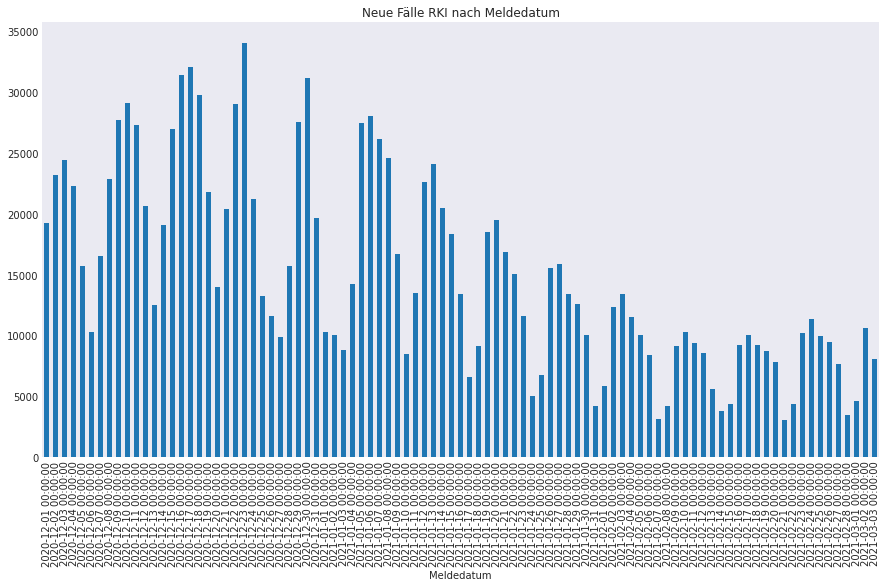

In [145]:
rki.NewCases['12-01-2020':].plot.bar()
plt.title("Neue Fälle RKI nach Meldedatum")

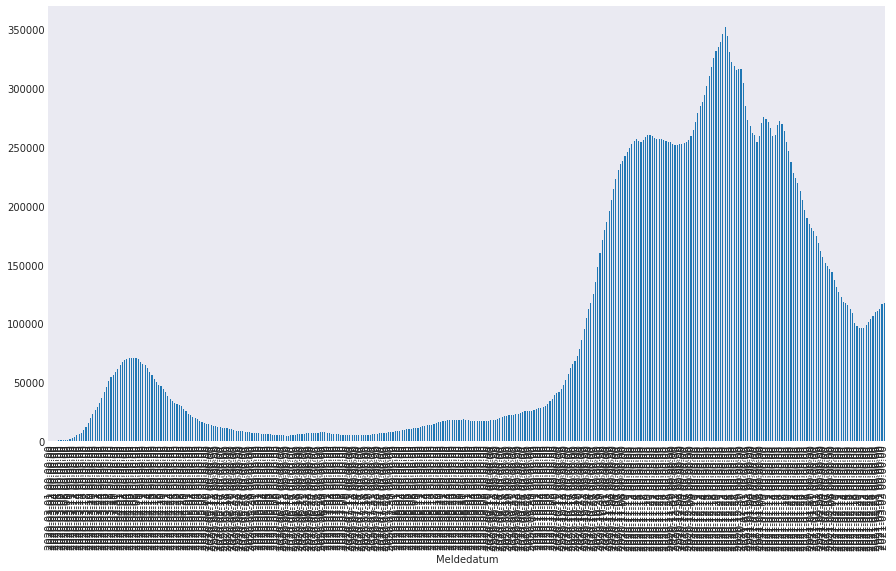

In [146]:
rki.ActiveCases['03-01-2020':].plot.bar()

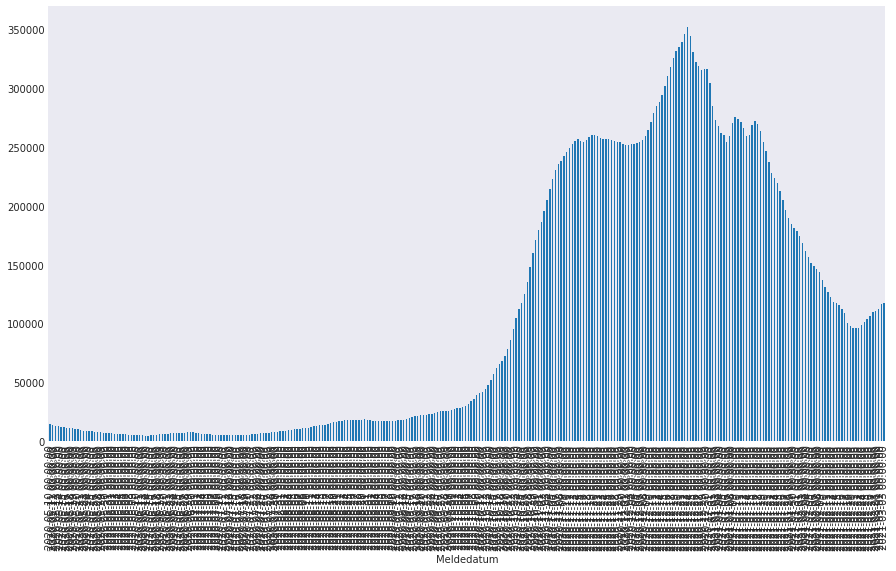

In [147]:
rki.ActiveCases['05-10-2020':].plot.bar()

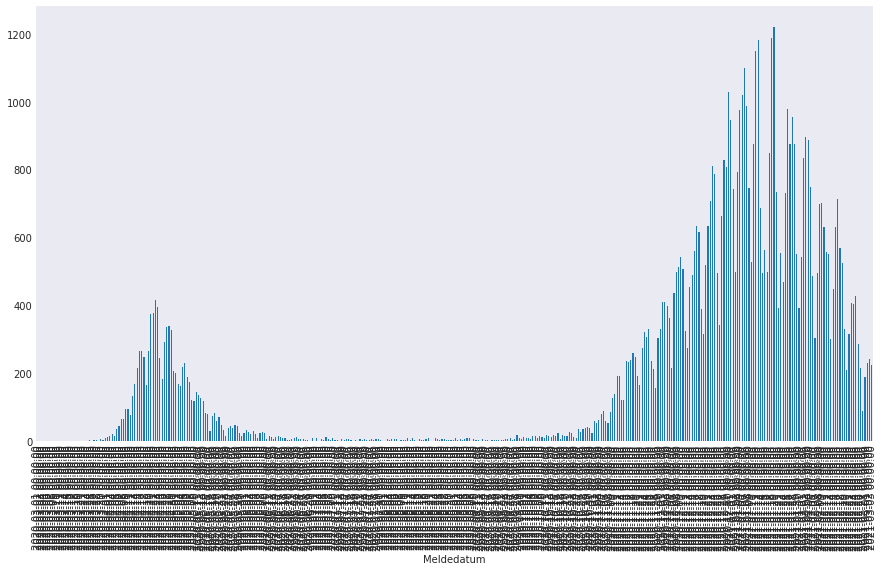

In [148]:
rki.NewDeath['03-01-2020':].plot.bar()

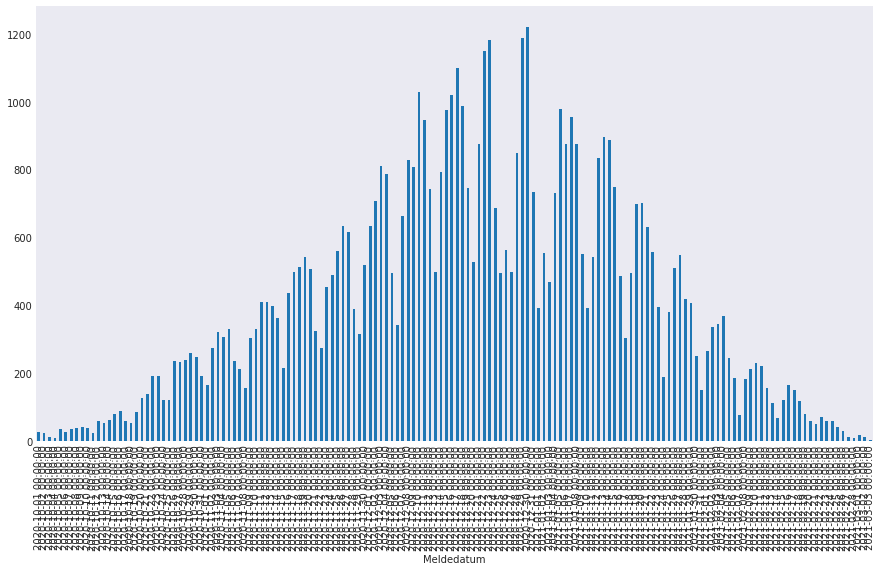

In [149]:
rki.NewDeathRKI['10-01-2020':].plot.bar()

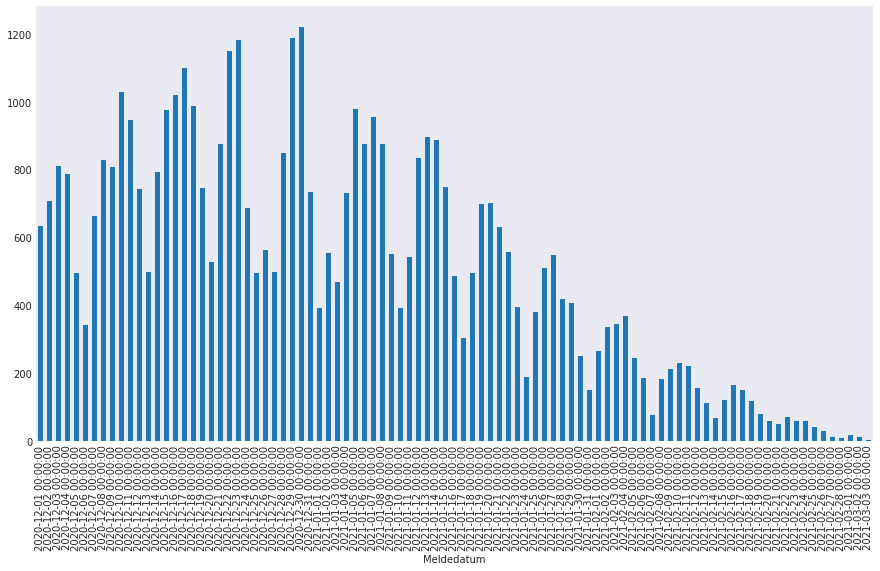

In [150]:
rki.NewDeathRKI['12-01-2020':].plot.bar()

Text(0.5, 1.0, 'Growth Germany')

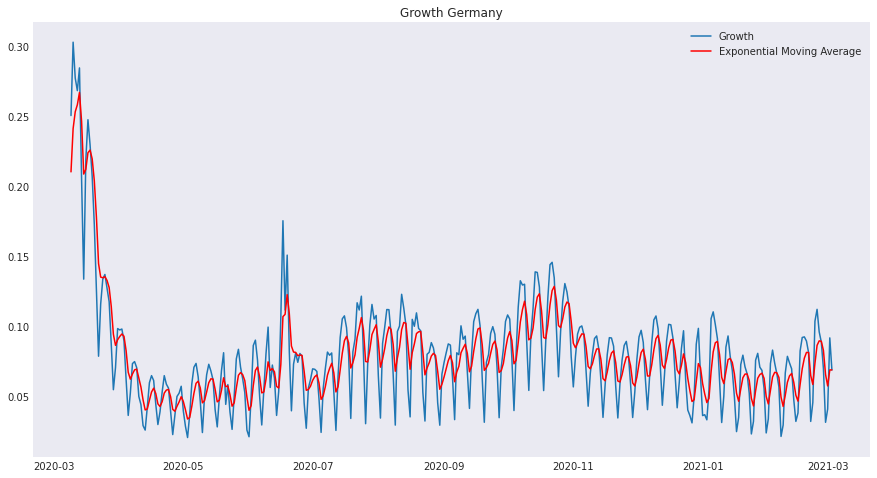

In [151]:
start_date = '03-09-2020'
x = rki[start_date:].index
plt.plot(x, rki.Growth[start_date:], label='Growth')
plt.plot(x, rki.Growth.ewm(span=5,adjust=False).mean()[start_date:], label='Exponential Moving Average', color='red')
plt.legend(loc='best')
plt.title('Growth Germany')

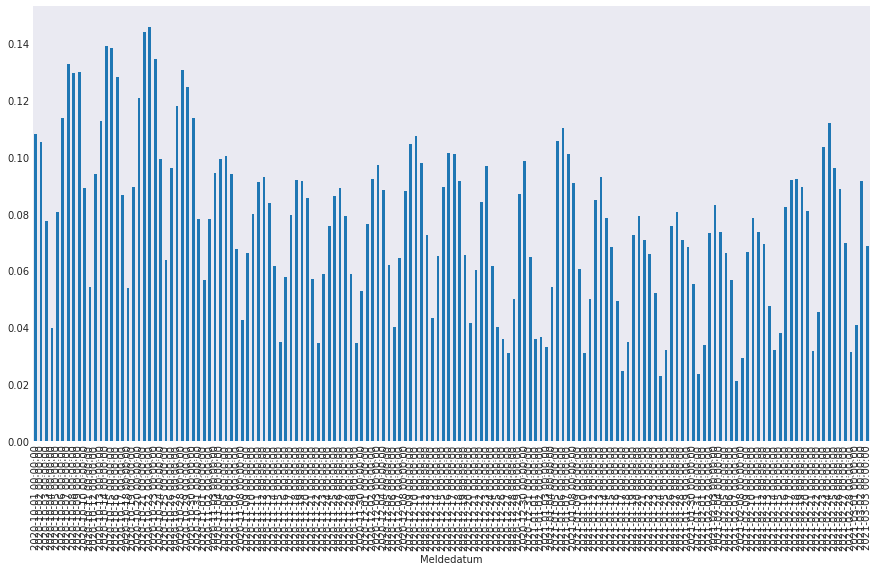

In [152]:
rki.Growth['10-01-2020':].plot.bar()

In [153]:
rki.tail(20)

NewCases  NewDeathRKI  NewRecoveredRKI  NewRecovered  NewDeath  \
Meldedatum                                                                   
2021-02-12      8538        156.0             5910       12163.0     551.0   
2021-02-13      5628        112.0             3842        9750.0     302.0   
2021-02-14      3753         68.0             2488        4061.0     448.0   
2021-02-15      4398        122.0             2796        5604.0     631.0   
2021-02-16      9251        164.0             6303       11976.0     713.0   
2021-02-17      9998        152.0             6812       13045.0     570.0   
2021-02-18      9253        119.0             6168       17299.0     525.0   
2021-02-19      8731         80.0             3382       10882.0     330.0   
2021-02-20      7793         60.0             2702        9154.0     211.0   
2021-02-21      3054         50.0              865        3110.0     316.0   
2021-02-22      4374         72.0              824        3581.0     408.0   
2021-02-23     10182         58.0             1199        7628.0     403.0   
2021-02-24     11315         59.0              996        8212.0     427.0   
2021-02-25      9932         43.0              567        7122.0     287.0   
2021-02-26      9436         31.0              310        6220.0     217.0   
2021-02-27      7659         12.0              187        4029.0      89.0   
2021-02-28      3461          8.0               69        2557.0     190.0   
2021-03-01      4575         17.0               62        2858.0     230.0   
2021-03-02     10653         12.0               88        6391.0     241.0   
2021-03-03      8054          2.0               33        6845.0     223.0   

              Cases    Death  Recovered  ActiveCases    Growth  
Meldedatum                                                      
2021-02-12  2330442  64479.0  2143085.0     122878.0  0.069484  
2021-02-13  2336070  64781.0  2152835.0     118454.0  0.047512  
2021-02-14  2339823  65229.0  2156896.0     117698.0  0.031887  
2021-02-15  2344221  65860.0  2162500.0     115861.0  0.037959  
2021-02-16  2353472  66573.0  2174476.0     112423.0  0.082287  
2021-02-17  2363470  67143.0  2187521.0     108806.0  0.091888  
2021-02-18  2372723  67668.0  2204820.0     100235.0  0.092313  
2021-02-19  2381454  67998.0  2215702.0      97754.0  0.089316  
2021-02-20  2389247  68209.0  2224856.0      96182.0  0.081023  
2021-02-21  2392301  68525.0  2227966.0      95810.0  0.031876  
2021-02-22  2396675  68933.0  2231547.0      96195.0  0.045470  
2021-02-23  2406857  69336.0  2239175.0      98346.0  0.103532  
2021-02-24  2418172  69763.0  2247387.0     101022.0  0.112005  
2021-02-25  2428104  70050.0  2254509.0     103545.0  0.095920  
2021-02-26  2437540  70267.0  2260729.0     106544.0  0.088564  
2021-02-27  2445199  70356.0  2264758.0     110085.0  0.069574  
2021-02-28  2448660  70546.0  2267315.0     110799.0  0.031237  
2021-03-01  2453235  70776.0  2270173.0     112286.0  0.040744  
2021-03-02  2463888  71017.0  2276564.0     116307.0  0.091594  
2021-03-03  2471942  71240.0  2283409.0     117293.0  0.068666

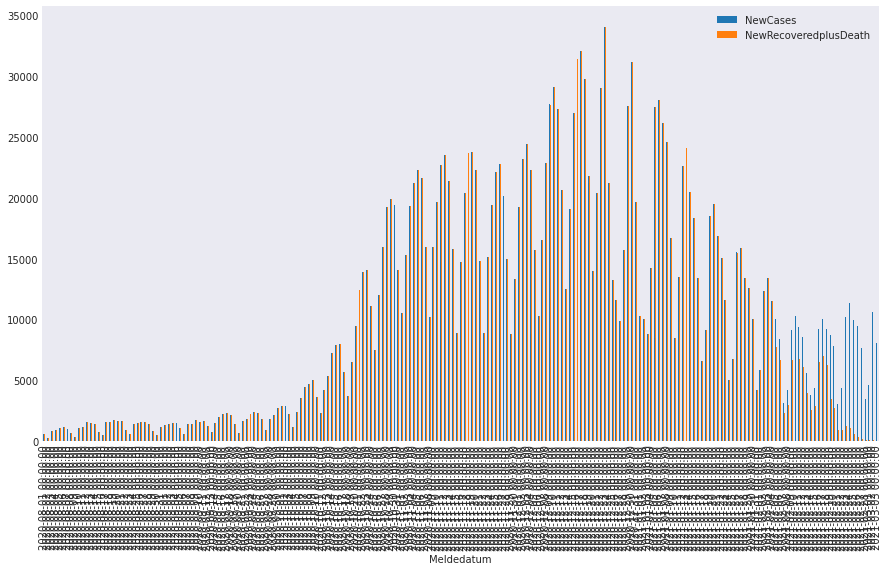

In [154]:
rki['NewRecoveredplusDeath'] = rki.NewRecoveredRKI + rki.NewDeathRKI
rki['08-01-2020':][['NewCases', 'NewRecoveredplusDeath']].plot.bar()
rki.drop('NewRecoveredplusDeath', axis=1, inplace=True)

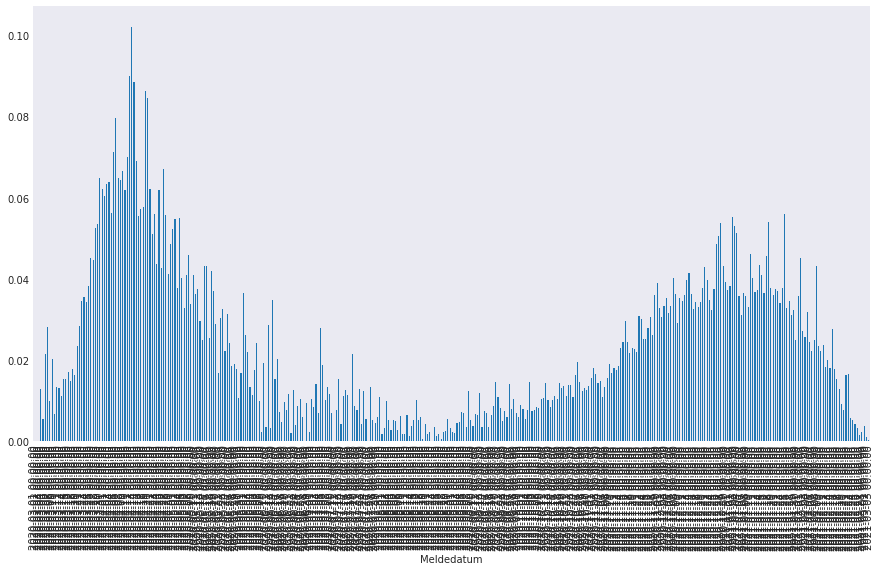

In [155]:
rki['Case Fatality'] = rki.NewDeathRKI / rki.NewCases
rki['Case Fatality']['03-01-2020':].plot.bar()

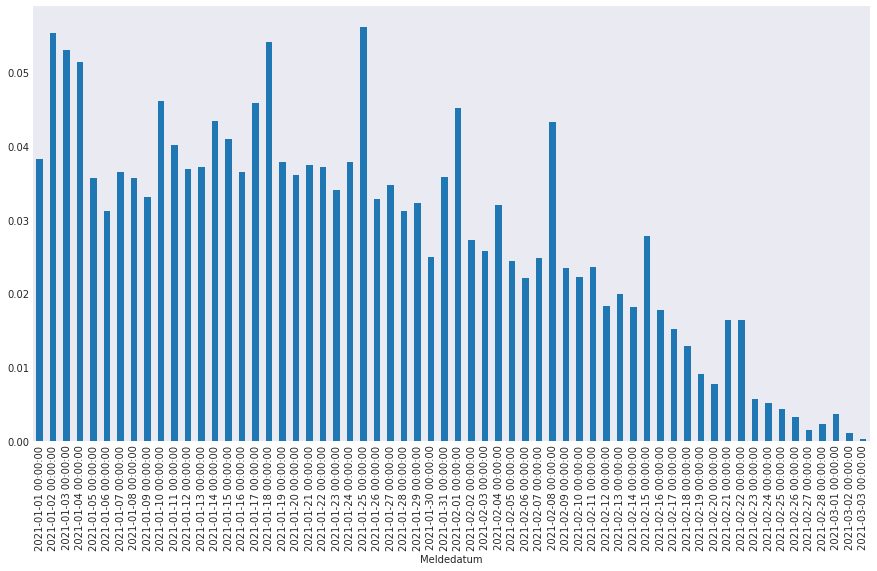

In [156]:
rki['Case Fatality']['01-01-2021':].plot.bar()

Text(0.5, 1.0, 'Case Fatality Germany')

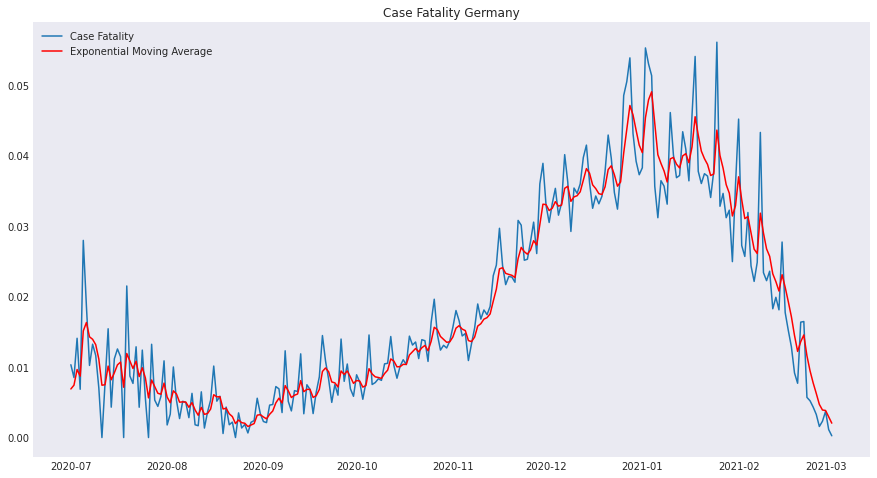

In [157]:

#(rki.Mortality['08-01-2020':] * 100).plot.bar()
start_date = '07-01-2020'
x = rki[start_date:].index
plt.plot(x, rki['Case Fatality'][start_date:], label='Case Fatality')
plt.plot(x, rki['Case Fatality'].ewm(span=5,adjust=False).mean()[start_date:], label='Exponential Moving Average', color='red')
plt.legend(loc='best')
plt.title('Case Fatality Germany')

In [158]:
rki['Case Fatality'].tail(30) * 100

Meldedatum
2021-02-02    2.724619
2021-02-03    2.569641
2021-02-04    3.192782
2021-02-05    2.435373
2021-02-06    2.215605
2021-02-07    2.487080
2021-02-08    4.329210
2021-02-09    2.339631
2021-02-10    2.225894
2021-02-11    2.359851
2021-02-12    1.827126
2021-02-13    1.990050
2021-02-14    1.811884
2021-02-15    2.773988
2021-02-16    1.772781
2021-02-17    1.520304
2021-02-18    1.286069
2021-02-19    0.916275
2021-02-20    0.769922
2021-02-21    1.637197
2021-02-22    1.646091
2021-02-23    0.569633
2021-02-24    0.521432
2021-02-25    0.432944
2021-02-26    0.328529
2021-02-27    0.156678
2021-02-28    0.231147
2021-03-01    0.371585
2021-03-02    0.112644
2021-03-03    0.024832
Name: Case Fatality, dtype: float64

In [159]:
rki.NewCases.tail(20)

Meldedatum
2021-02-12     8538
2021-02-13     5628
2021-02-14     3753
2021-02-15     4398
2021-02-16     9251
2021-02-17     9998
2021-02-18     9253
2021-02-19     8731
2021-02-20     7793
2021-02-21     3054
2021-02-22     4374
2021-02-23    10182
2021-02-24    11315
2021-02-25     9932
2021-02-26     9436
2021-02-27     7659
2021-02-28     3461
2021-03-01     4575
2021-03-02    10653
2021-03-03     8054
Name: NewCases, dtype: int64